In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input

IMAGE_SHAPE = (224, 224)

# Define the data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\datasets\train",
    target_size=IMAGE_SHAPE,
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\datasets\test",
    target_size=IMAGE_SHAPE,
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)


C:\Users\User\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Found 3002 images belonging to 7 classes.
Found 286 images belonging to 7 classes.


In [3]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=IMAGE_SHAPE+(3,))
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=60
)


Epoch 1/60


47/47 [==============================] - 252s 5s/step - loss: 1.7893 - accuracy: 0.3211 - val_loss: 1.5448 - val_accuracy: 0.4301
Epoch 2/60
47/47 [==============================] - 224s 5s/step - loss: 1.5143 - accuracy: 0.4324 - val_loss: 1.4577 - val_accuracy: 0.5035
Epoch 3/60
47/47 [==============================] - 214s 5s/step - loss: 1.4215 - accuracy: 0.4737 - val_loss: 1.4144 - val_accuracy: 0.4895
Epoch 4/60
47/47 [==============================] - 219s 5s/step - loss: 1.3251 - accuracy: 0.5073 - val_loss: 1.3962 - val_accuracy: 0.5175
Epoch 5/60
47/47 [==============================] - 218s 5s/step - loss: 1.2596 - accuracy: 0.5326 - val_loss: 1.3683 - val_accuracy: 0.5035
Epoch 6/60
47/47 [==============================] - 214s 5s/step - loss: 1.1782 - accuracy: 0.5753 - val_loss: 1.4221 - val_accuracy: 0.4965
Epoch 7/60
47/47 [==============================] - 218s 5s/step - loss: 1.1143 - accuracy: 0.5913 - val_loss: 1.3679 - val_accuracy: 0.5350
Epoch 8/60


47/47 [==============================] - 216s 5s/step - loss: 0.0775 - accuracy: 0.9853 - val_loss: 2.0884 - val_accuracy: 0.6014
Epoch 56/60
47/47 [==============================] - 216s 5s/step - loss: 0.0633 - accuracy: 0.9840 - val_loss: 2.1164 - val_accuracy: 0.5839
Epoch 57/60
47/47 [==============================] - 214s 5s/step - loss: 0.0622 - accuracy: 0.9860 - val_loss: 2.1568 - val_accuracy: 0.5699
Epoch 58/60
47/47 [==============================] - 215s 5s/step - loss: 0.0697 - accuracy: 0.9837 - val_loss: 2.1625 - val_accuracy: 0.5769
Epoch 59/60
47/47 [==============================] - 215s 5s/step - loss: 0.0692 - accuracy: 0.9850 - val_loss: 2.1951 - val_accuracy: 0.5699
Epoch 60/60
47/47 [==============================] - 217s 5s/step - loss: 0.0635 - accuracy: 0.9880 - val_loss: 2.2643 - val_accuracy: 0.5699


In [5]:
# Unfreeze the top layers of the model
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)


Epoch 1/50
47/47 [==============================] - 280s 6s/step - loss: 2.7055 - accuracy: 0.3441 - val_loss: 2.4678 - val_accuracy: 0.5245
Epoch 2/50
47/47 [==============================] - 274s 6s/step - loss: 1.7654 - accuracy: 0.4554 - val_loss: 2.6218 - val_accuracy: 0.5000
Epoch 3/50
47/47 [==============================] - 281s 6s/step - loss: 1.5196 - accuracy: 0.4950 - val_loss: 2.3657 - val_accuracy: 0.4895
Epoch 4/50
47/47 [==============================] - 273s 6s/step - loss: 1.3461 - accuracy: 0.5333 - val_loss: 2.1292 - val_accuracy: 0.4790
Epoch 5/50
47/47 [==============================] - 282s 6s/step - loss: 1.2052 - accuracy: 0.5753 - val_loss: 1.9401 - val_accuracy: 0.4860
Epoch 6/50
47/47 [==============================] - 281s 6s/step - loss: 1.1116 - accuracy: 0.6083 - val_loss: 1.8004 - val_accuracy: 0.4860
Epoch 7/50
47/47 [==============================] - 274s 6s/step - loss: 1.0043 - accuracy: 0.6586 - val_loss: 1.7370 - val_accuracy: 0.4895
Epoch 8/50
47

In [6]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


5/5 [==============================] - 18s 4s/step - loss: 2.8855 - accuracy: 0.5664
Validation Loss: 2.8855345249176025
Validation Accuracy: 0.5664335489273071


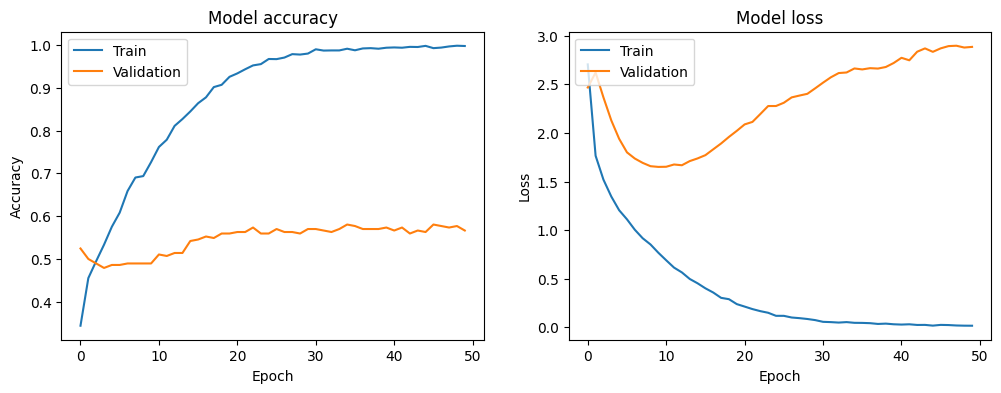

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

plot_history(history_fine)


In [9]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\User\OneDrive\Desktop\EmoSense\Face Emotion Recognition\datasets\test",  # Replace with the path to your test images
    target_size=IMAGE_SHAPE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order for evaluation
)


Found 1437 images belonging to 7 classes.


In [10]:
import numpy as np
# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true labels from the test generator
y_test = test_generator.classes

# Calculate the accuracy using the custom function
def accuracy(A):
    count = 0
    y_t = y_test[0:A.size]  # Adjust range as necessary
    for i in range(A.size):
        if A[i] == y_t[i]:
            count += 1
    acc = (count / A.size) * 100
    return acc

acc = accuracy(predicted_classes)
print(f'Accuracy: {acc:.2f}%')


45/45 [==============================] - 82s 2s/step
Accuracy: 44.33%


In [11]:
# Assuming 'model' is your trained model
model.save('32batch_model.h5')  # You can use .h5 or no extension for SavedModel format


C:\Users\User\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
